# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

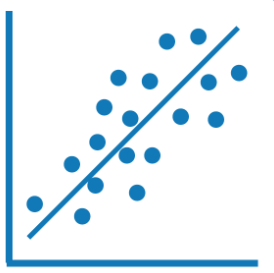

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [11]:
#solution
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()



C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
import pandas as pd
df =pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [13]:
df['target']= boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


<AxesSubplot:>

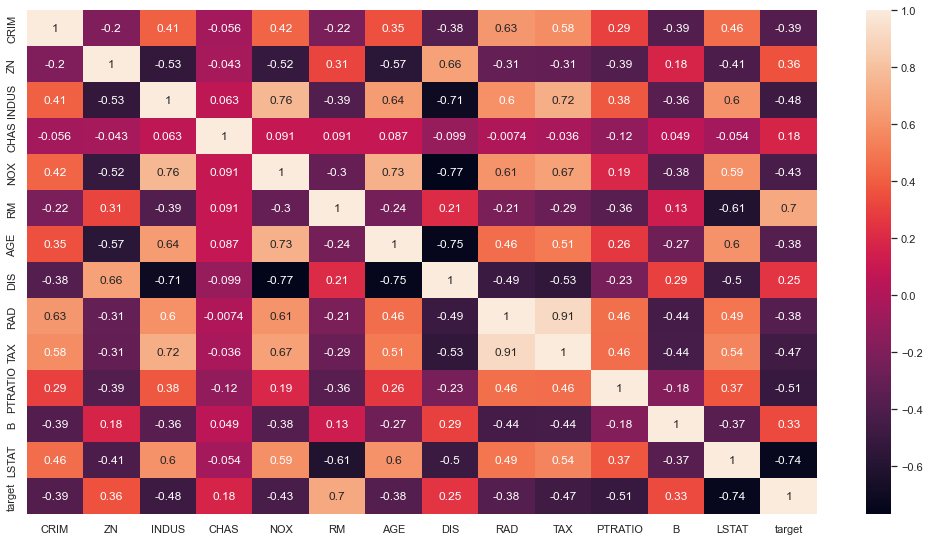

In [19]:
#Solution
#creating relation between 
data=df.corr()
import seaborn as sns
sns.set(rc={'figure.figsize':(17.7,9.27)})
sns.heatmap(data,annot=True)

In [64]:
#create linear model

from sklearn.linear_model import LinearRegression
#create linear regression object

model = LinearRegression() 
x=df[['RM']]
y=df.target
#fit data to model
model.fit(x,y)
model.coef_
model.intercept_
model.predict([[6.575]])
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x)
MSE= mean_squared_error(y_pred,y)
MSE

C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.60055177116956

## <font color = blue>3. Explore Linear Model attributes


In [29]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model

model.coef_


array([9.10210898])

In [28]:
#use intercept_ attributes to get the bias value
model.intercept_



-34.67062077643857

In [33]:
model.predict([[6.575]])


C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [63]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x)
MSE= mean_squared_error(y_pred,y)
MSE
                 


C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AGE
- ZN
Feature names seen at fit time, yet now missing:
- LSTAT
- PTRATIO

  warnings.warn(message, FutureWarning)


1043.373400809753

## <font color = blue>5. Make Predictions


In [62]:
#Use predict method to make prediction to unseen data
x_sample = [[6.575],[6.421]]
model.predict(x_sample)


C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [56]:
model1 = LinearRegression() 
X=df[['RM','PTRATIO','LSTAT']]
y=df.target
model1.fit(X,y)
model1.coef_



array([ 4.51542094, -0.93072256, -0.57180569])

In [57]:
model1.intercept_

18.56711150539518

## <font color = blue>7. Make Prediction for Multi linear Model


In [59]:
#Solution
from sklearn.metrics import mean_squared_error
y_pred= model1.predict(X)
MSE= mean_squared_error(y_pred,y)
MSE


27.13040575849706

In [60]:
x_sample = [[6,3,3],[7,2,3]]
model1.predict(x_sample)

C:\Users\LAb-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41.15205244, 46.59819594])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df =pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()
df['target']= boston.target


In [100]:
ndf=df.select_dtypes(include=["int64","float64"])
ndf

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [101]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'mean')
data = impute.fit_transform(ndf)
cdf1= pd.DataFrame(data,columns= ndf.columns)
cdf1.isna().sum()
cdf1

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
numericdf = scaler.fit_transform(cdf1)
newdf= pd.DataFrame(numericdf, columns=cdf1.columns)
newdf

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LSTAT    target  
0    0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1    0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2    0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3    0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4    0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  
..        ...       ...       ...       ...       ...       ...  
501  0.000000  0.164122  0.893617  0.987619  0.219095  0.386667  
502  0.000000  0.164122  0.893617  1.000000  0.202815  0.346667  
503  0.000000  0.164122  0.893617  1.000000  0.107892  0.420000  
504  0.000000  0.164122  0.893617  0.991301  0.131071  0.377778  
505  0.000000  0.164122  0.893617  1.000000  0.169702  0.153333  

[506 rows x 14 columns]

In [103]:
model2 = LinearRegression() 
X=newdf[['RM','PTRATIO','LSTAT']]
y=newdf.target
model2.fit(X,y)
model2.coef_
model2.intercept_
from sklearn.metrics import mean_squared_error
y_pred= model2.predict(X)
MSE= mean_squared_error(y_pred,y)
MSE


0.01339773123876398

In [ ]:
x_sample = [[6,3,3],[7,2,3]]
model1.predict(x_sample)